# Discrete charge distribution
## Case 2D
$$\phi_P = \frac{1}{4 \pi \epsilon_0} \sum_{i=1}^{N_q} Q_i$$
em que 
$$Q_i = \left\{\begin{array}{ll} 
0, & x_p = x_{Q_i} \ \ \ and \ \ \  y_P = y_{Q_i} \\
\frac{q_i}{\sqrt{(x_P - x_{Q_i})^2 + (y_P - y_{Q_i})^2}}, & otherwise
\end{array}\right.$$

In [133]:
# Importing libraries
from math import pi, sqrt
from numpy import loadtxt, linspace, zeros, meshgrid
from matplotlib.pyplot import subplots, show, contourf, colorbar

In [134]:
# Importing charge informations:
# Matrix with information of each charge:
path = r"C:\Users\eduar\Desktop\New programs\Charges2d - SeparatedHexagonal.txt"
data = loadtxt(path, delimiter=',', dtype=float) 
charges = list() # List with vectors representing the charges
Nq = data.shape[0]
for i in range(Nq):
    charges.append(data[i,:]) # vector = (xQ, yQ, q)

In [135]:
# Defining the electric potential function:
def phi(x, y, q_vec):
    e0 = 8.85e-12 # F/m
    xQ, yQ, q = q_vec
    s = 0
    for i in range(Nq):
        if (x==xQ) and (y==yQ):
            s += 0
        else:
            s += q/sqrt((x-xQ)**2+(y-yQ)**2)
    potential = s/(4*pi*e0)
    return potential

In [136]:
# Creating range of positions P to be evaluated:
Nx, Ny = 51, 51 # Number of points for x and y
x_arr, y_arr = linspace(-5,5,Nx), linspace(-5,5,Ny) 
xx, yy = meshgrid(x_arr, y_arr)
# Calculating the electric potential at each point P due to each charge:
Phi = zeros(shape=(Nx,Ny),dtype=float)
for i, xP in enumerate(x_arr):
    for j, yP in enumerate(y_arr):
        for charge in charges:
            Phi[i,j] += phi(xP, yP, charge)

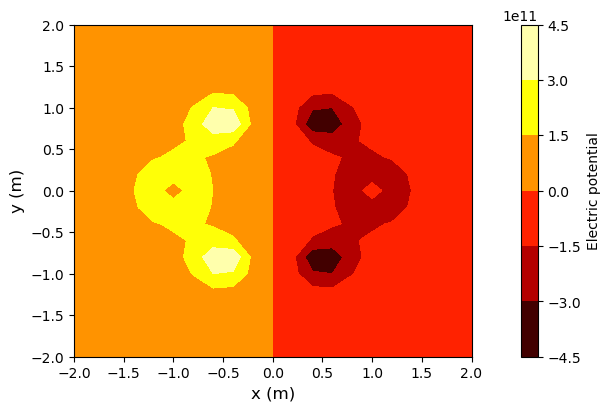

In [142]:
# Contour plot of electric potential:
fig1, ax1 = subplots(figsize=(6,4),layout='constrained')
ax1.set_xlabel('x (m)',loc='center',fontsize=12)
ax1.set_ylabel('y (m)',loc='center',fontsize=12)
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
C1 = ax1.contourf(xx,yy,Phi.T,cmap='hot') # Using Phi.T to match shapes with xx and yy
C1_bar = fig1.colorbar(C1) # The intensity legend
C1_bar.ax.set_ylabel('Electric potential')
show()

In [153]:
# Save figure:
fig1.savefig(r"C:\Users\eduar\Desktop\New programs\Electric potential - Separated hexagonal.png")

In [139]:
# Calculating the electric field:
hx, hy = x_arr[1] - x_arr[0], y_arr[1] - y_arr[0] # steps in x and y directions
Ex, Ey = zeros(shape=(Nx,Ny),dtype=float), zeros(shape=(Nx,Ny),dtype=float)
for i in range(1,Nx-1):
    for j in range(1,Ny-1):
        # Centered numerical derivatives:
        dphidx = (Phi[i+1,j] - Phi[i-1,j]) / (2*hx) # displacement in rows representing x
        dphidy = (Phi[i,j+1] - Phi[i,j-1]) / (2*hy) # displacement in columns representing y
        Ex[i,j], Ey[i,j] = -dphidx, -dphidy # electric field components

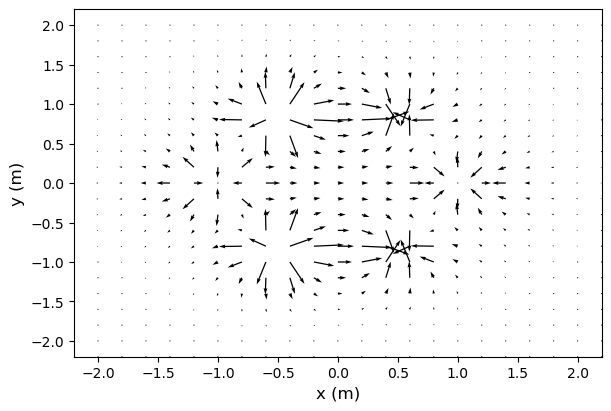

In [152]:
# Quiver plot of electric field:
fig2, ax2 = subplots(figsize=(6,4),layout='constrained')
ax2.set_xlabel('x (m)',loc='center',fontsize=12)
ax2.set_ylabel('y (m)',loc='center',fontsize=12)
ax2.set_xlim(-2.2,2.2)
ax2.set_ylim(-2.2,2.2)
ax2.quiver(xx,yy,Ex.T,Ey.T,units='height',scale=1.2e13)
show()


In [154]:
# Save figure:
fig2.savefig(r"C:\Users\eduar\Desktop\New programs\Electric field - Separated hexagonal.png")

# Continuous charge distribution
## Case 2D
### Cartesian coordinates
$$\phi = \frac{1}{4\pi \epsilon_0} \int_{-L/2}^{L/2} \int_{-L/2}^{L/2} \frac{\sigma(x,y)}{\sqrt{(x - x_P)^2 + (y - y_P)^2}} dx dy$$
Then, we need to calculate 
$$I \equiv \int_{-L/2}^{L/2} \int_{-L/2}^{L/2} \frac{\sigma(x,y)}{\sqrt{(x - x_P)^2 + (y - y_P)^2}} dx dy$$
So,
$$\phi = \frac{1}{4 \pi \epsilon_0} I$$

In [289]:
from math import sin, sqrt, pi
from numpy import array, arange, zeros, meshgrid, linspace
from gaussxw import gaussxwab
from matplotlib.pyplot import contourf, subplots, show, colorbar

In [293]:
q0, e0 = 100, 8.8541878176e-12 # C/m^2, F/m^2
Lx, Ly = 1, 1 # m, m
cx, cy = 2*pi/Lx, 2*pi/Ly
Nx, Ny = 21, 21
xP_arr, yP_arr = linspace(-2,2,Nx), linspace(-2,2,Ny)
xx, yy = meshgrid(xP_arr,yP_arr)

In [294]:
def sigma(x,y):
    # value = sin(cx*x)*sin(cy*y)
    value = x+y
    return value

def f(x,y,xP,yP):
    integrand = sigma(x,y)/sqrt((x-xP)**2+(y-yP)**2)
    return integrand

def gauss(xP,yP):
    ax, bx = -Lx/2, Lx/2
    ay, by = -Ly/2, Ly/2
    Gx, Gy = 100, 100
    x, wx = gaussxwab(Gx,ax,bx)
    y, wy = gaussxwab(Gy,ay,by)
    sy = 0.0
    for j in range(Gy):
        sx = 0.0
        for i in range(Gx):
            sx += wy[j]*wx[i]*f(x[i],y[j],xP,yP)
        sy += sx
    phi = q0*sy/(4*pi*e0)
    return phi


In [295]:
Phi = zeros(shape=(Nx,Ny),dtype=float)
for i,xP in enumerate(xP_arr):
    for j,yP in enumerate(yP_arr):
        Phi[i,j] = gauss(xP,yP)

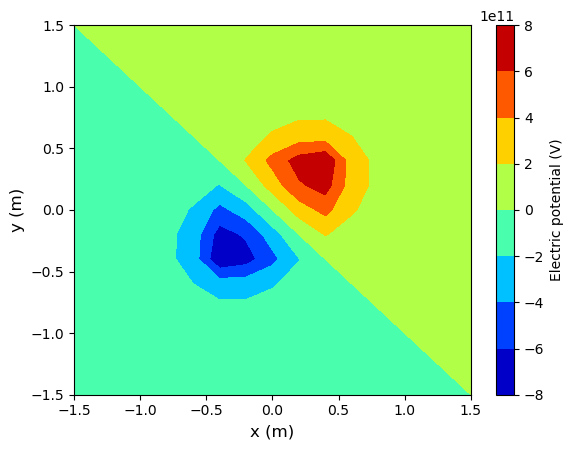

In [297]:
fig3, ax3 = subplots()
ax3.set_xlabel('x (m)',loc='center',fontsize=12)
ax3.set_ylabel('y (m)',loc='center',fontsize=12)
ax3.set_xlim(-1.5,1.5)
ax3.set_ylim(-1.5,1.5)
C2 = ax3.contourf(xx,yy,Phi.T,cmap='jet')
C2_bar = fig3.colorbar(C2)
C2_bar.ax.set_ylabel('Electric potential (V)')
show()

In [298]:
# Save figure:
fig3.savefig(r"C:\Users\eduar\Desktop\New programs\Electric potential - Square xy distribution.png")

In [299]:
# Calculating the electric field:
hx, hy = x_arr[1] - x_arr[0], y_arr[1] - y_arr[0] # steps in x and y directions
Ex, Ey = zeros(shape=(Nx,Ny),dtype=float), zeros(shape=(Nx,Ny),dtype=float)
for i in range(1,Nx-1):
    for j in range(1,Ny-1):
        # Centered numerical derivatives:
        dphidx = (Phi[i+1,j] - Phi[i-1,j]) / (2*hx) # displacement in rows representing x
        dphidy = (Phi[i,j+1] - Phi[i,j-1]) / (2*hy) # displacement in columns representing y
        Ex[i,j], Ey[i,j] = -dphidx, -dphidy # electric field components

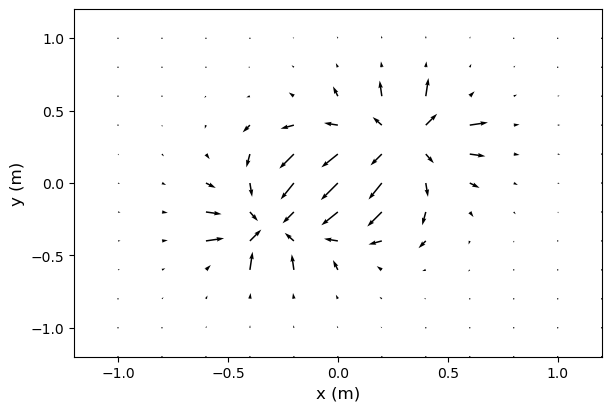

In [300]:
# Quiver plot of electric field:
fig4, ax4 = subplots(figsize=(6,4),layout='constrained')
ax4.set_xlabel('x (m)',loc='center',fontsize=12)
ax4.set_ylabel('y (m)',loc='center',fontsize=12)
ax4.set_xlim(-1.2,1.2)
ax4.set_ylim(-1.2,1.2)
ax4.quiver(xx,yy,Ex.T,Ey.T,units='height',scale=3e12)
show()


In [284]:
# Save figure:
fig4.savefig(r"C:\Users\eduar\Desktop\New programs\Electric field - Square xy distribution.png")

### Polar coordinates
$$\phi = \frac{a}{4 \pi \epsilon_0} I$$
em que
$$I = \int_{0}^{2 \pi} \frac{\lambda (\theta)}{\sqrt{a^2 + r_P^2 -2 a r_P \cos(\theta + \theta_P)}} d\theta.$$
Por exemplo:
$$\lambda (\theta) = \sin(\theta)$$

In [79]:
# Importing libraries:
from math import cos, sin, sqrt, atan2, pi
from numpy import linspace, meshgrid, zeros
from matplotlib.pyplot import subplots, show, contourf, colorbar
from gaussxw import gaussxwab

In [81]:
# Constants of the problem:
a, e0 = 1, 8.85e-12 # m, F/m
# Arrays:
Nx, Ny = 51, 51
x_arr, y_arr = linspace(-2,2,Nx), linspace(-2,2,Ny)
xx, yy = meshgrid(x_arr, y_arr)

In [126]:
# Change coordinates from (x,y) to (r,theta):
def convert(x,y):
     r = sqrt(x**2 + y**2)
     theta = atan2(x,y)
     coord = (r, theta)
     return coord

# Charge density function:
def density(theta):
    value = sin(theta) + cos(theta)
    return value

# Integrand used in the integration method:
def f(theta,r_P,theta_P):
    integrand = density(theta) / sqrt(a**2 + r_P**2 - 2*a*r_P*cos(theta + theta_P))
    return integrand

# Calculate the electric potential:
def phi(r_P,theta_P):
  Nt = 1000
  at, bt = 0, 2*pi
  theta = linspace(at,bt,Nt)
  h = (bt - at)/Nt
  s1,s2 = 0,0
  for k in range(1,Nt,2):
    s1 += f(at+k*h,r_P,theta_P)
  for k in range(2,Nt-1,2):
    s2 += f(at+k*h,r_P,theta_P)
  I = h/3*(f(at,r_P,theta_P)+f(bt,r_P,theta_P)+4*s1+2*s2)
  phi = a*I / (4*pi*e0)
  return phi

   

In [127]:
# Initializaing phi matrix:
Phi = zeros(shape=(Nx,Ny),dtype=float)
for i, xP in enumerate(x_arr):
    for j, yP in enumerate(y_arr):
        r_P, theta_P = convert(xP, yP)
        Phi[i,j] = phi(r_P, theta_P)

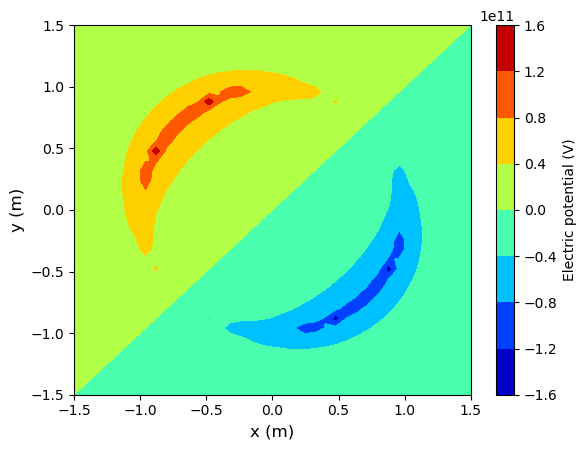

In [128]:
# Contour plot of electric potential:
fig5, ax5 = subplots()
ax5.set_xlabel('x (m)',loc='center',fontsize=12)
ax5.set_ylabel('y (m)',loc='center',fontsize=12)
ax5.set_xlim(-1.5,1.5)
ax5.set_ylim(-1.5,1.5)
C3 = ax5.contourf(xx,yy,Phi.T,cmap='jet')
C3_bar = fig5.colorbar(C3)
C3_bar.ax.set_ylabel('Electric potential (V)')
show()

In [129]:
# Save figure:
fig5.savefig(r"C:\Users\eduar\Desktop\New programs\Electric field - Ring sin+cos.png")

## Case 3D

In [135]:
# Importing libraries:
from math import cos, sin, sqrt, atan, pi
from numpy import linspace, meshgrid, zeros
from matplotlib.pyplot import subplots, show, contourf, colorbar
from gaussxw import gaussxwab

In [136]:
# Constants of the problem:
a, e0 = 1, 8.85e-12 # m, F/m
# Arrays:
Nx, Ny, Nz = 21, 21, 21
x_arr, y_arr, z_arr = linspace(-2,2,Nx), linspace(-2,2,Ny), linspace(-2,2,Nz)
xx, yy, zz = meshgrid(x_arr, y_arr, z_arr)

In [149]:
# Change coordinates from (x,y,z) to (r,phi,theta):
def convert(x,y,z):
  # radius:
  r = sqrt(x**2 + y**2 + z**2)
  # phi:
  if x > 0:
    phi = atan(y/x)
  elif (x < 0) and (y >= 0):
    phi = pi + atan(y/x)
  elif (x < 0) and (y < 0):
    phi = pi - atan(y/x)
  elif (x == 0) and (y > 0):
    phi = pi/2
  # elif (x == 0) and (y < 0):
  #   phi = -pi/2
  else:
    phi = -pi/2
  # theta:
  if z > 0:
    theta = atan((x**2 + y**2) / z)
  elif z < 0:
    theta = pi + atan((x**2 + y**2) / z)
  # elif (z == 0) and (x*y != 0):
  #   theta = pi/2
  else:
    theta = pi/2
  coord = (r, phi, theta)
  return coord

# Charge density function:
def density(phi,theta):
    value = 2
    return value

# Integrand used in the integration method:
def f(phi,theta,r_P,phi_P,theta_P):
    integrand = density(phi,theta)*sin(theta)/sqrt(a**2+r_P**2-a*r_P*((1+cos(phi_P-phi))*cos(theta_P-theta)+(1-cos(phi_P-phi))*cos(theta_P+theta)))
    return integrand

# Calculate the electric potential:
def potential(r_P,phi_P,theta_P):
  # Creating phi and theta arrays:
  a_phi, b_phi = 0, 2*pi
  a_theta, b_theta = 0, pi 
  N_phi, N_theta = 10, 10
  phi = linspace(a_phi,b_phi,N_phi)
  theta = linspace(a_theta,b_theta,N_theta)
  h_phi, h_theta = (b_phi-a_phi)/N_phi, (b_theta-a_theta)/N_theta
  # Simpson's Method for double integration:
  # Initializing the sums:
  s_phi_odd, s_phi_even = 0.0, 0.0
  s_theta_odd, s_theta_even = 0.0, 0.0
  # Sumation over odd indices:
  for i in range(1,N_theta,2):
    s_theta_odd += s_phi_odd
    for j in range(1,N_phi,2):
      s_phi_odd += f(a_phi+j*h_phi,a_theta+i*h_theta,r_P,phi_P,theta_P)
  # Sumation over even indices:
  for i in range(2,N_theta-1,2):
    s_theta_even += s_phi_even
    for j in range(2,N_phi-1,2):
      s_phi_even += f(a_phi+j*h_phi,a_theta+i*h_theta,r_P,phi_P,theta_P)
  I = h_theta*(f(a_phi,a_theta,r_P,phi_P,theta_P)+f(b_phi,b_theta,r_P,phi_P,theta_P)+4*s_phi_odd+2*s_phi_even)/3
  phi = a**2*I/(4*pi*e0)
  return phi

In [150]:
# Initializaing phi matrix:
Potential = zeros(shape=(Nx,Ny,Nz),dtype=float)
for i, xP in enumerate(x_arr):
    for j, yP in enumerate(y_arr):
        for k, zP in enumerate(z_arr):
            r_P, phi_P, theta_P = convert(xP, yP, zP)
            Potential[i,j,k] = potential(r_P, phi_P, theta_P)

ZeroDivisionError: float division by zero